# CAB420 Assignment 1A Question 2: Template
Simon Denman (s.denman@qut.edu.au)

## Overview

This notebook provides a brief template for CAB420 Assignment 1A, Question 2. It simply implements the data loading, and splitting the data into the predictors and response. You are to use the data splits defined here in your response.

The template also provides other suggestions around how to approach the problem.

Please make sure you read the assignment brief on canvas, and check the FAQ for other information.

**Note: File paths used in this template may need to change for your local machine. Please set these based on your local file system structure.**

In [36]:
#report first inital search for parameters (scale between this and this, then say you did another coarse grain serach around that to obtain it)

import pandas
from sklearn.model_selection import PredefinedSplit
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt

In [70]:
# load data
train = pandas.read_csv('Data/Q2/training.csv')
val = pandas.read_csv('Data/Q2/validation.csv')
test = pandas.read_csv('Data/Q2/testing.csv')

# pull out X and y data, convert to numpy
X_train = train.iloc[:,1:].to_numpy()
Y_train = train.iloc[:,0].to_numpy()
X_val = val.iloc[:,1:].to_numpy()
Y_val = val.iloc[:,0].to_numpy()
X_test = test.iloc[:,1:].to_numpy()
Y_test = test.iloc[:,0].to_numpy()

# Count the number of unique values in the first column
unique_counts = train.iloc[:, 0].value_counts()

# Print the unique values and their counts
for value, count in unique_counts.items():
    print(f"{value} = {count} count")

s  = 59 count
d  = 54 count
h  = 48 count
o  = 37 count


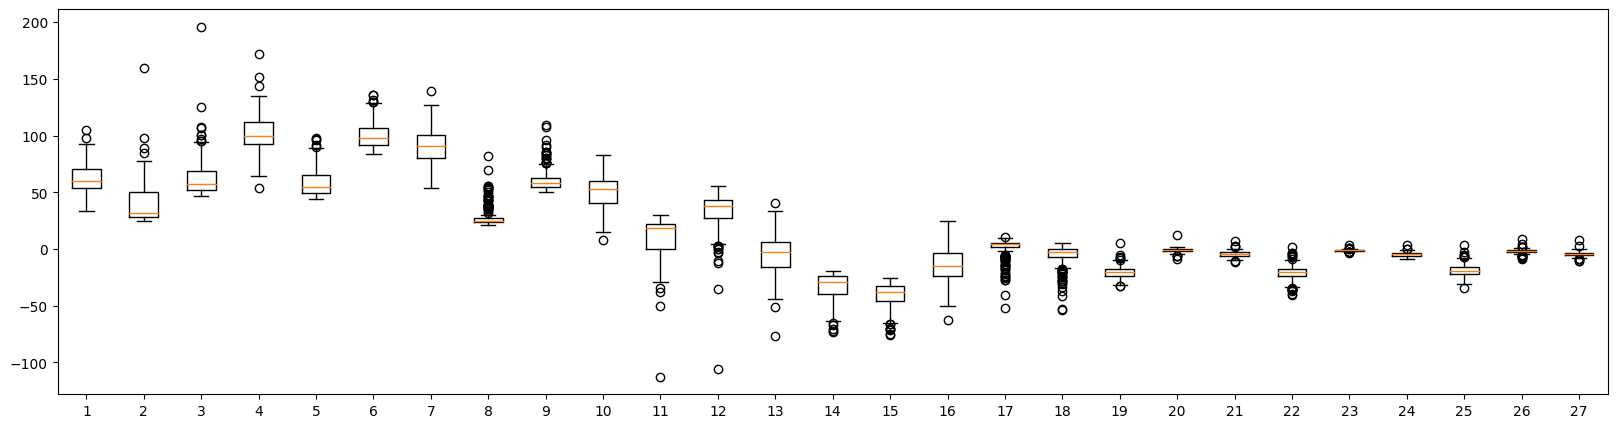

In [38]:
# If you wish to pre-process the data, do so here. In your write-up, outline why you choose to do, or choose not to do, any
# pre-processing 
# #standardise beacuse using distance measures with k nearest neighbour. makes visualisation easier cause all dimensions are roughly in same range.
# random forests arent affected by standardisation

X_scaler = StandardScaler().fit(X_train)
X_train_std = X_scaler.transform(X_train)
X_val_std = X_scaler.transform(X_val)
X_test_std = X_scaler.transform(X_test)


In [87]:
# Q2 asks you to use a grid search for each model. You are to evaluate the models on the validation set, and train on the train
# set. If you wish to use sklearn's GridSearchCV, you will need to setup a PredefinedSplit to pass into this. An appropraite
# PredefinedSplit object is created below.

#Gridsearch helps find right parameters
# X_train_and_val = np.vstack((X_train, X_val))
# Y_train_and_val = np.hstack((Y_train, Y_val))
# mask = np.zeros(len(Y_train_and_val))
# mask[0:len(Y_train)] = -1
# train_val_split = PredefinedSplit(mask)

#
def eval_model(model, X_train, Y_train, X_Val, Y_Val, X_test, Y_test):
    fig = plt.figure(figsize=[25, 8])
    ax = fig.add_subplot(1, 3, 1)
    conf = ConfusionMatrixDisplay.from_estimator(model, X_train, Y_train, normalize='true', ax=ax)
    conf.ax_.set_title('Training Set Performance: %1.3f' % (sum(model.predict(X_train) == Y_train)/len(Y_train)));
    ax = fig.add_subplot(1, 3, 2)
    conf = ConfusionMatrixDisplay.from_estimator(model, X_Val, Y_Val, normalize='true', ax=ax)
    conf.ax_.set_title('Val Set Performance: %1.3f' % (sum(model.predict(X_Val) == Y_Val)/len(Y_val)));
    ax = fig.add_subplot(1, 3, 3)
    conf = ConfusionMatrixDisplay.from_estimator(model, X_test, Y_test, normalize='true', ax=ax)
    conf.ax_.set_title('Testing Set Performance: %1.3f' % (sum(model.predict(X_test) == Y_test)/len(Y_test)));
    print(classification_report(Y_test, model.predict(X_test)))

              precision    recall  f1-score   support

          d        0.77      0.83      0.80        53
          h        0.54      0.87      0.67        15
          o        0.95      0.65      0.77        31
          s        0.83      0.79      0.81        62

    accuracy                           0.78       161
   macro avg       0.77      0.78      0.76       161
weighted avg       0.81      0.78      0.79       161

Best Model Parameters:
KNeighborsClassifier(metric='euclidean', n_neighbors=16)

Best Model Parameters for No weighting:
{'k': 16, 'weight': 'distance', 'acc': 0.8646237535190887, 'metric': 'euclidean'}
Mean Cross-Validation Accuracy: 0.9244871794871795


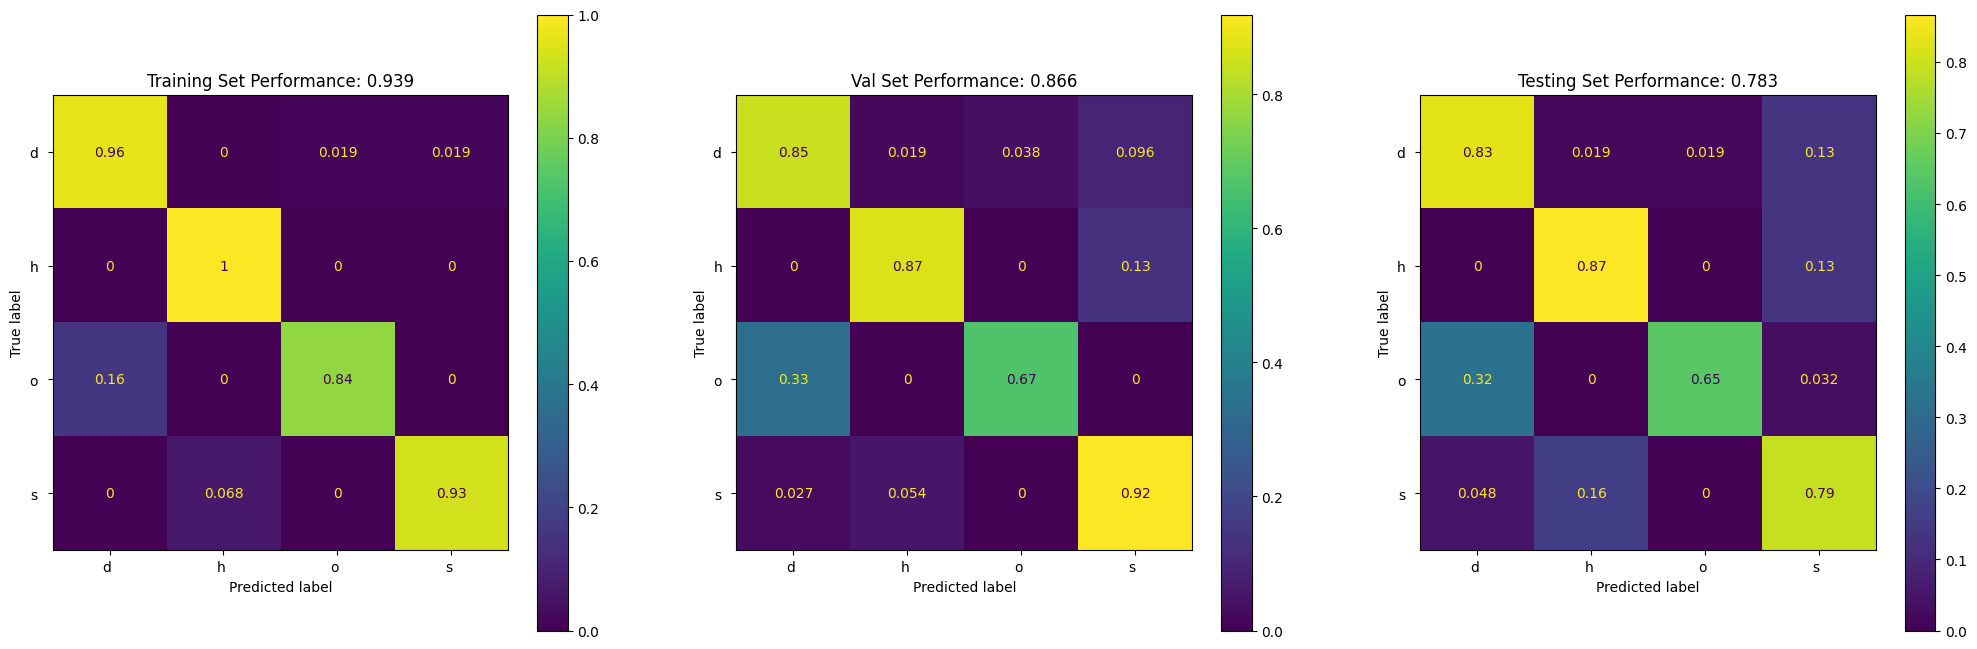

In [123]:
# Train your CKNN. You should consider the following parameters at least:
#  - K
#  - Distance Metric (try euclidian and cityblock/manhattan)
# cosine = something that have been nomalised such that they have same magnitude, 
# cityblock=lots of stuff that represents different units/things, 
# euclidian good default if no specific knowledge of vector space of data
#  - Weighting Scheme # rates classes based on the inverse of thier frequency. more forgiving with vclasses that are rare. typicaly used for classes with imbalance. classes that are more rare has more weight

#tried distance based weighted scheme. however,Impact of Class Distribution: The distribution of classes ('s', 'd', 'h', 'o') in your dataset 
# also plays a role. If one class dominates the training set in terms of count (e.g., 's' with 59 samples), the model may be biased towards predicting that class accurately, especially when using distance-based weighting.


#weighting scheme=uniform(default) was used
values_of_k = [ 8, 16, 32, 64, 128, 198] # did this up to maximum number of samples
distance_metric = ['cityblock','euclidean','cosine']
best_acc = 0
best_model = None
results = []

for k in values_of_k:
    for m in distance_metric:        
        cknn = KNeighborsClassifier(n_neighbors=k, metric=m).fit(X_train_std, Y_train)  
        acc = f1_score(Y_val, cknn.predict(X_val_std), average='weighted')
        results.append({'k':k, 'weight': 'distance', 'acc':acc, 'metric': m})
        
        if (acc > best_acc):
            best_acc = acc
            best_model = cknn
            
    
eval_model(best_model, X_train_std, Y_train, X_val_std, Y_val, X_test_std, Y_test)
print("Best Model Parameters:")
print(best_model)
best_model_info = max(results, key=lambda x: np.mean(x['acc']))

print()
# Print the best model's information
print("Best Model Parameters for No weighting:")
print(best_model_info)  


# Initialize the Random Forest classifier with specified hyperparameters
cknn_classifier = KNeighborsClassifier(metric='euclidean', n_neighbors=16)

# Perform cross-validation to evaluate the model
cv_scores = cross_val_score(cknn_classifier, X_train_std, Y_train, cv=5)

# Print the mean cross-validation accuracy
print("Mean Cross-Validation Accuracy:", cv_scores.mean())


              precision    recall  f1-score   support

          d        0.88      0.85      0.87        53
          h        0.56      0.93      0.70        15
          o        0.93      0.81      0.86        31
          s        0.88      0.82      0.85        62

    accuracy                           0.84       161
   macro avg       0.81      0.85      0.82       161
weighted avg       0.86      0.84      0.84       161

Best Model Parameters for weighted:
OneVsOneClassifier(estimator=SVC(C=0.1, kernel='linear', max_iter=10000000))
Best Model Parameters for weighted:
{'kernel': 'linear', 'C': 0.1, 'acc': 0.8717932666568342}
Mean Cross-Validation Accuracy: 0.9697435897435897


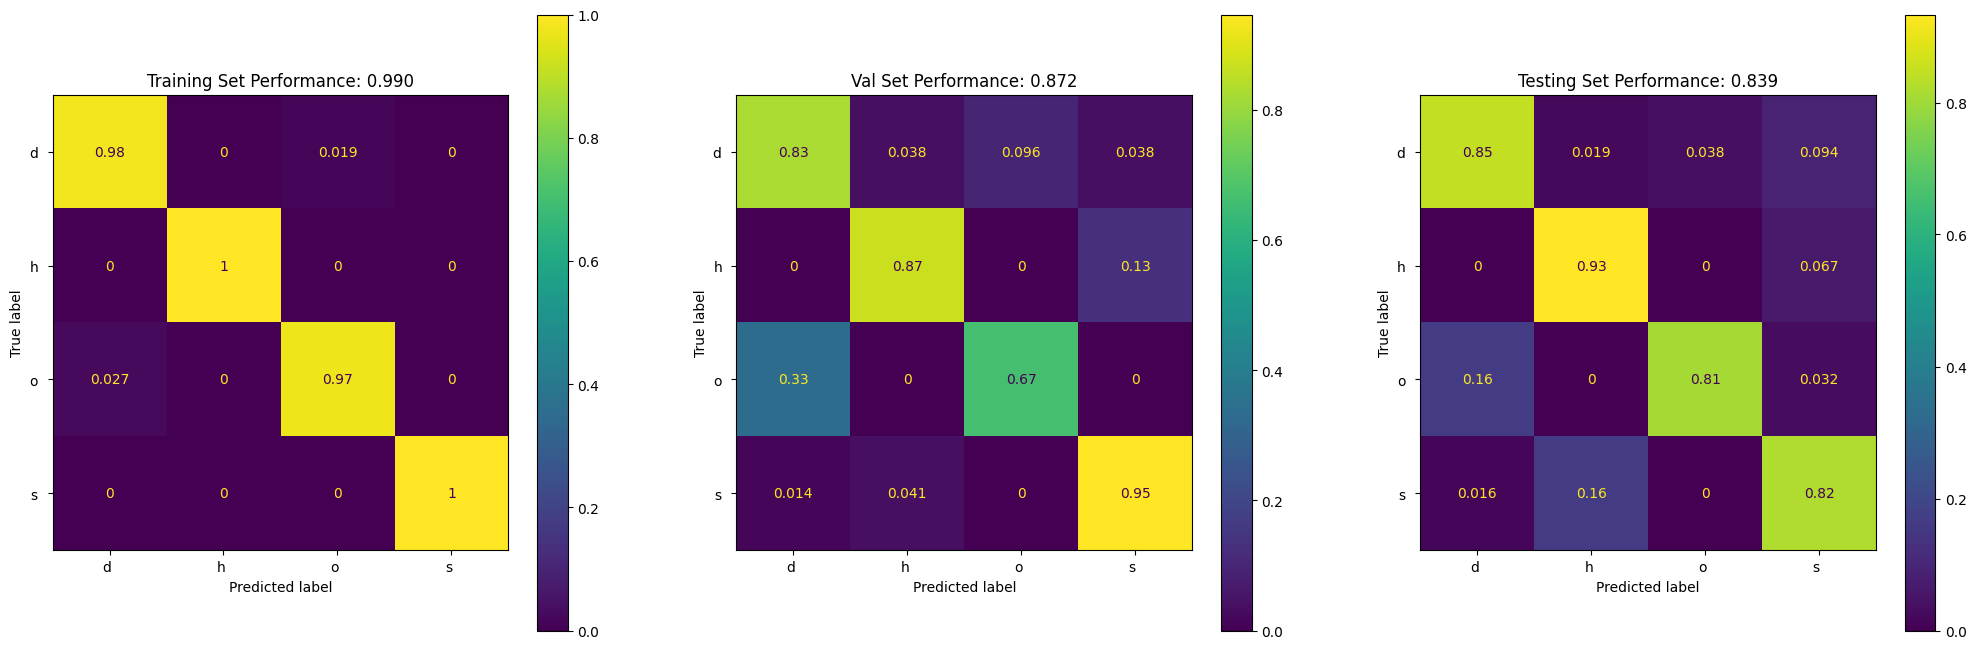

In [124]:
# Train your SVM. You should consider the following parameters at least:
#  - C  #Controls how strictly models needs to seperate classes (kinda like regularisation, trading off model accuracy versus model generality. a bigger value means less regularisation (making very strict where things should be)). will need different value depending on kernal type.
#  - Kernel Type  #defaut = gaussian kernal. another popular option is linear kernal which trys to draw a straight line between planes. changes what C value is optimal
#  - Kernel Parameters

#1v1 may be slightly better for class imbalance

C = [1e-5, 1e-3, 1e-1, 1, 1e1, 1e3, 1e5]
gamma = [1e-1, 1, 1e1, 'auto', 'scale'] # for rbf
degree = [3, 5, 7, 9] # for poly

best_acc = 0
best_model = None
results = []
 
#RBF Kernal        
for c in C:
    for g in gamma:
        
        #Macro
        svm = OneVsRestClassifier(SVC(kernel='rbf', C=c, gamma=g, max_iter=int(1e7), class_weight='balanced')).fit(X_train_std, Y_train)
        acc = f1_score(Y_val, svm.predict(X_val_std), average='macro')
        results.append({'kernel':'rbf', 'C':c, 'gamma': g, 'acc':acc, 'ens':'1vAll'})
        if (acc > best_acc):
            best_acc = acc
            best_model = svm                
        
        svm = OneVsOneClassifier(SVC(kernel='rbf', C=c, gamma=g, max_iter=int(1e7), class_weight='balanced')).fit(X_train, Y_train)
        acc = f1_score(Y_val, svm.predict(X_val), average='macro')
        results.append({'kernel':'rbf', 'C':c, 'gamma': g, 'acc':acc, 'ens':'1v1'})
        if (acc > best_acc):
            best_acc = acc
            best_model = svm     
                               
#Linear Kernal            
for c in C:
    svm = OneVsRestClassifier(SVC(kernel='linear', C=c, max_iter=int(1e7)).fit(X_train_std, Y_train)).fit(X_train_std, Y_train)
    acc = f1_score(Y_val, svm.predict(X_val_std), average='macro')
    results.append({'kernel':'linear', 'C':c, 'acc':acc})
    if (acc > best_acc):
        best_acc = acc
        best_model = svm
        
    svm = OneVsOneClassifier(SVC(kernel='linear', C=c, max_iter=int(1e7)).fit(X_train_std, Y_train)).fit(X_train_std, Y_train)
    acc = f1_score(Y_val, svm.predict(X_val_std), average='macro')
    results.append({'kernel':'linear', 'C':c, 'acc':acc})
    if (acc > best_acc):
        best_acc = acc
        best_model = svm

        

#Poly Kernal                 
for c in C:
    for d in degree:
        #Macro
        svm = OneVsRestClassifier(SVC(kernel='poly', C=c, degree=d, max_iter=int(1e7)).fit(X_train, Y_train)).fit(X_train_std, Y_train)
        acc = f1_score(Y_val, svm.predict(X_val), average='macro')
        results.append({'kernel':'poly', 'C':c, 'degree':d, 'acc':acc})
        if (acc > best_acc):
            best_acc = acc
            best_model = svm   
            
        svm = OneVsOneClassifier(SVC(kernel='poly', C=c, degree=d, max_iter=int(1e7)).fit(X_train, Y_train)).fit(X_train_std, Y_train)
        acc = f1_score(Y_val, svm.predict(X_val), average='macro')
        results.append({'kernel':'poly', 'C':c, 'degree':d, 'acc':acc})
        if (acc > best_acc):
            best_acc = acc
            best_model = svm          
        

#weighted
C = [1e-5, 1e-3, 1e-1, 1, 1e1, 1e3, 1e5]
gamma = [1e-1, 1, 1e1, 'auto', 'scale'] # for rbf
degree = [3, 5, 7, 9] # for poly

best_acc = 0
best_model = None
results = []
 
#RBF Kernal        
for c in C:
    for g in gamma:
        
        #Macro
        svm = OneVsRestClassifier(SVC(kernel='rbf', C=c, gamma=g, max_iter=int(1e7), class_weight='balanced')).fit(X_train_std, Y_train)
        acc = f1_score(Y_val, svm.predict(X_val_std), average='weighted')
        results.append({'kernel':'rbf', 'C':c, 'gamma': g, 'acc':acc, 'ens':'1vAll'})
        if (acc > best_acc):
            best_acc = acc
            best_model = svm                
        
        svm = OneVsOneClassifier(SVC(kernel='rbf', C=c, gamma=g, max_iter=int(1e7), class_weight='balanced')).fit(X_train, Y_train)
        acc = f1_score(Y_val, svm.predict(X_val), average='weighted')
        results.append({'kernel':'rbf', 'C':c, 'gamma': g, 'acc':acc, 'ens':'1v1'})
        if (acc > best_acc):
            best_acc = acc
            best_model = svm     
                               
#Linear Kernal            
for c in C:
    svm = OneVsRestClassifier(SVC(kernel='linear', C=c, max_iter=int(1e7)).fit(X_train_std, Y_train)).fit(X_train_std, Y_train)
    acc = f1_score(Y_val, svm.predict(X_val_std), average='weighted')
    results.append({'kernel':'linear', 'C':c, 'acc':acc})
    if (acc > best_acc):
        best_acc = acc
        best_model = svm
        
    svm = OneVsOneClassifier(SVC(kernel='linear', C=c, max_iter=int(1e7)).fit(X_train_std, Y_train)).fit(X_train_std, Y_train)
    acc = f1_score(Y_val, svm.predict(X_val_std), average='weighted')
    results.append({'kernel':'linear', 'C':c, 'acc':acc})
    if (acc > best_acc):
        best_acc = acc
        best_model = svm

        

#Poly Kernal                 
for c in C:
    for d in degree:
        #Macro
        svm = OneVsRestClassifier(SVC(kernel='poly', C=c, degree=d, max_iter=int(1e7)).fit(X_train, Y_train)).fit(X_train_std, Y_train)
        acc = f1_score(Y_val, svm.predict(X_val), average='weighted')
        results.append({'kernel':'poly', 'C':c, 'degree':d, 'acc':acc})
        if (acc > best_acc):
            best_acc = acc
            best_model = svm   
            
        svm = OneVsOneClassifier(SVC(kernel='poly', C=c, degree=d, max_iter=int(1e7)).fit(X_train, Y_train)).fit(X_train_std, Y_train)
        acc = f1_score(Y_val, svm.predict(X_val), average='weighted')
        results.append({'kernel':'poly', 'C':c, 'degree':d, 'acc':acc})
        if (acc > best_acc):
            best_acc = acc
            best_model = svm   
    
eval_model(best_model, X_train_std, Y_train, X_val_std, Y_val, X_test_std, Y_test)
print("Best Model Parameters for weighted:")
print(best_model)
best_model_info = max(results, key=lambda x: x['acc'])

# Print the best model's information
print("Best Model Parameters for weighted:")
print(best_model_info)   


#NONE
C = [1e-5, 1e-3, 1e-1, 1, 1e1, 1e3, 1e5]
gamma = [1e-1, 1, 1e1, 'auto', 'scale'] # for rbf
degree = [3, 5, 7, 9] # for poly

best_acc = 0
best_model = None
results = []
 
#RBF Kernal        
for c in C:
    for g in gamma:
        
        #rbf
        svm = OneVsRestClassifier(SVC(kernel='rbf', C=c, gamma=g, max_iter=int(1e7), class_weight='balanced')).fit(X_train_std, Y_train)
        acc = f1_score(Y_val, svm.predict(X_val_std), average=None)
        results.append({'kernel':'rbf', 'C':c, 'gamma': g, 'acc':acc, 'ens':'1vAll'})
        if (np.mean(acc) > best_acc):
            best_acc = np.mean(acc)
            best_model = svm                
        
        svm = OneVsOneClassifier(SVC(kernel='rbf', C=c, gamma=g, max_iter=int(1e7), class_weight='balanced')).fit(X_train, Y_train)
        acc = f1_score(Y_val, svm.predict(X_val), average=None)
        results.append({'kernel':'rbf', 'C':c, 'gamma': g, 'acc':acc, 'ens':'1v1'})
        if (np.mean(acc) > best_acc):
            best_acc = np.mean(acc)
            best_model = svm     
                               
#Linear Kernal            
for c in C:
    svm = OneVsRestClassifier(SVC(kernel='linear', C=c, max_iter=int(1e7)).fit(X_train_std, Y_train)).fit(X_train_std, Y_train)
    acc = f1_score(Y_val, svm.predict(X_val_std), average=None)
    results.append({'kernel':'linear', 'C':c, 'acc':acc})
    if (np.mean(acc) > best_acc):
        best_acc = np.mean(acc)
        best_model = svm
        
    svm = OneVsOneClassifier(SVC(kernel='linear', C=c, max_iter=int(1e7)).fit(X_train_std, Y_train)).fit(X_train_std, Y_train)
    acc = f1_score(Y_val, svm.predict(X_val_std), average=None)
    results.append({'kernel':'linear', 'C':c, 'acc':acc})
    if (np.mean(acc) > best_acc):
        best_acc = np.mean(acc)
        best_model = svm

        

#Poly Kernal                 
for c in C:
    for d in degree:
        #Macro
        svm = OneVsRestClassifier(SVC(kernel='poly', C=c, degree=d, max_iter=int(1e7)).fit(X_train, Y_train)).fit(X_train_std, Y_train)
        acc = f1_score(Y_val, svm.predict(X_val), average=None)
        results.append({'kernel':'poly', 'C':c, 'degree':d, 'acc':acc})
        if (np.mean(acc) > best_acc):
            best_acc = np.mean(acc)
            best_model = svm   
            
        svm = OneVsOneClassifier(SVC(kernel='poly', C=c, degree=d, max_iter=int(1e7)).fit(X_train, Y_train)).fit(X_train_std, Y_train)
        acc = f1_score(Y_val, svm.predict(X_val), average=None)
        results.append({'kernel':'poly', 'C':c, 'degree':d, 'acc':acc})
        if (np.mean(acc) > best_acc):
            best_acc = np.mean(acc)
            best_model = svm   
    

# Initialize the Random Forest classifier with specified hyperparameters
svm_classifier = OneVsOneClassifier(SVC(C=0.1, kernel='linear', max_iter=int(1e7)))

# Perform cross-validation to evaluate the model
cv_scores = cross_val_score(svm_classifier, X_train_std, Y_train, cv=5)

# Print the mean cross-validation accuracy
print("Mean Cross-Validation Accuracy:", cv_scores.mean())

              precision    recall  f1-score   support

          d        0.79      0.72      0.75        53
          h        0.68      0.87      0.76        15
          o        0.83      0.77      0.80        31
          s        0.82      0.85      0.83        62

    accuracy                           0.80       161
   macro avg       0.78      0.80      0.79       161
weighted avg       0.80      0.80      0.79       161

Best Model Parameters:
RandomForestClassifier(class_weight='balanced', max_depth=8, n_estimators=200,
                       random_state=42)

Best Model:
{'max_depth': 8, 'n_estimators': 200, 'class_weights': 'balanced', 'acc': 0.7957401345699218}
Mean Cross-Validation Accuracy: 0.9648717948717949


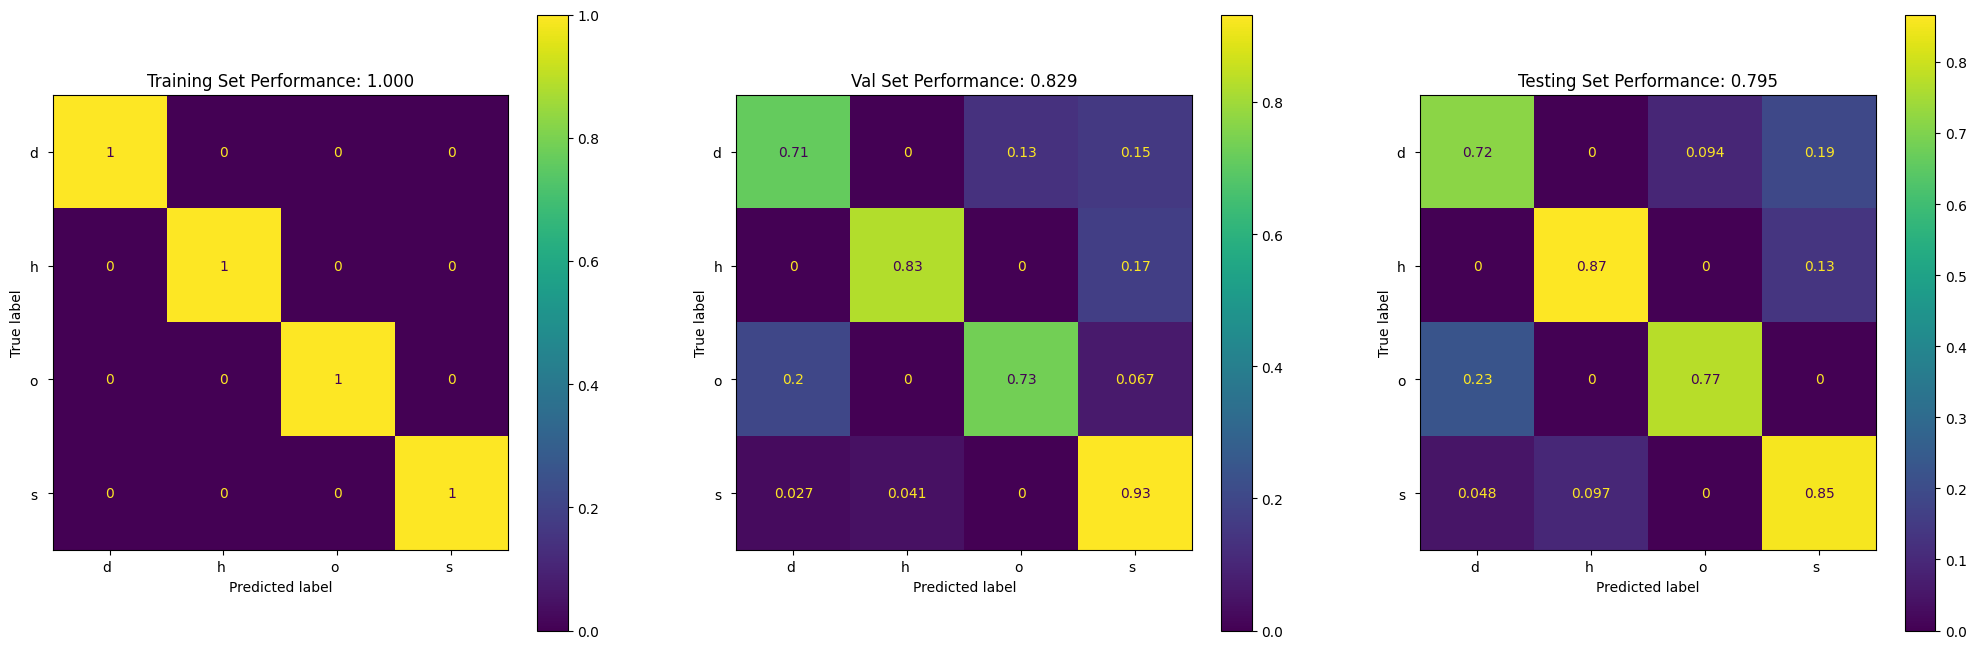

In [122]:
# Train your RF. You should consider the following parameters at least:
#  - Tree depth
#  - Number of estimators (number of trees)
from sklearn.ensemble import RandomForestClassifier

max_depth = [4, 8, 16, 32, None]
n_estimators = [100, 200, 400, 800]
class_weights = [None, 'balanced', 'balanced_subsample']

best_model = None
best_acc = 0
results = []

for d in max_depth:
    for n in n_estimators:
        for c in class_weights:
            rf = RandomForestClassifier(max_depth=d,n_estimators=n, random_state=42, class_weight=c).fit(X_train_std, Y_train)
            acc = f1_score(Y_val, rf.predict(X_val_std), average='macro')  #can change this             
            results.append({'max_depth':d, 'n_estimators':n, 'class_weights':c, 'acc':acc})
            
            if (acc > best_acc):
                best_acc = acc
                best_model = rf        
                
eval_model(best_model, X_train_std, Y_train, X_val_std, Y_val, X_test_std, Y_test)

print("Best Model Parameters:")
print(best_model)
best_model_info = max(results, key=lambda x: np.mean(x['acc']))

print()
# Print the best model's information
print("Best Model:")
print(best_model_info)  





# Initialize the Random Forest classifier with specified hyperparameters
rf_classifier = RandomForestClassifier(n_estimators=200, max_depth=8, random_state=42)

# Perform cross-validation to evaluate the model
cv_scores = cross_val_score(rf_classifier, X_train_std, Y_train, cv=5)

# Print the mean cross-validation accuracy
print("Mean Cross-Validation Accuracy:", cv_scores.mean())


#Use class weight if data is imbalanced. macro makes all classes equally important

In [ ]:
# Evaluate the three methods. This should consider appropriate performance measures for the classifiers, such as F1, and 
# visualisations of performance (i.e. confusion matrices) that demonstrate any difference in perfomance between the models.

In [ ]:
# For your write-up, you should include:
# - a discussion of any pre-processing you did and why; or why you left the data as-is
# - a discussion of how you selected the hyper-parameters for each of your models, and how these may be influenced by any data 
#   characteristics, and any effect you may see from the selected hyper-parameters (ie. if you have found a small value for a 
#   hyper parameter, what effect will this have on the model compared to a large value?) 
# - an evaluation and comparison of three models, which should highlight any differences observed between the models
# Your write-up should be supported by appropriate figures and tables. Figures and tables should have numbers and meaningful captions
#
# SEE THE ASSIGNMENT BRIEF ON CANVAS FOR MORE DETAILS AND NOTE THAT A NOTEBOOK FILE DOES NOT CONSTITUTE A VALID SUBMISSION. 
# YOU SHOULD WRITE UP YOUR RESPONSE IN A SEPARATE DOCUMENT